In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [84]:
purchases = pd.read_csv(r'purchases.csv')
purchases.head(5)

,eventDate,userID,configTag,media_source,user_country,account_days,moneySpent,league,revenue,token_revenue,offer_revenue
0,2023-03-01,2ca55c95-b855-11ed-9961-c264c1aef672,D,Organic,NaN,0,0.0,0,0.0,0.0,0.0
1,2023-03-13,1dbb0d64-c1b6-11ed-b5c6-3aa152a4963b,E,Organic,NaN,0,0.0,0,0.0,0.0,0.0
2,2023-03-13,284f1275-c1c2-11ed-b5c6-3aa152a4963b,C,Organic,NaN,0,0.0,0,0.0,0.0,0.0
3,2023-03-08,18037545-bd50-11ed-b53b-26ff1ab837b5,C,Organic,NaN,0,0.0,0,0.0,0.0,0.0
4,2023-03-02,1c29339a-b909-11ed-9961-c264c1aef672,C,Organic,NaN,0,0.0,0,0.0,0.0,0.0


In [85]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349412 entries, 0 to 349411
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventDate      349412 non-null  object 
 1   userID         349412 non-null  object 
 2   configTag      348894 non-null  object 
 3   media_source   349412 non-null  object 
 4   user_country   349356 non-null  object 
 5   account_days   349412 non-null  int64  
 6   moneySpent     349412 non-null  float64
 7   league         349412 non-null  int64  
 8   revenue        349412 non-null  float64
 9   token_revenue  349412 non-null  float64
 10  offer_revenue  349412 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 29.3+ MB


In [86]:
purchases = purchases[(purchases['revenue'] < percentile(purchases[purchases['revenue'] > 0]['revenue'], 95))]

In [87]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349188 entries, 0 to 349411
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventDate      349188 non-null  object 
 1   userID         349188 non-null  object 
 2   configTag      348670 non-null  object 
 3   media_source   349188 non-null  object 
 4   user_country   349132 non-null  object 
 5   account_days   349188 non-null  int64  
 6   moneySpent     349188 non-null  float64
 7   league         349188 non-null  int64  
 8   revenue        349188 non-null  float64
 9   token_revenue  349188 non-null  float64
 10  offer_revenue  349188 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 32.0+ MB


In [88]:
purchases.dropna(subset=['configTag'], inplace=True)

In [89]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348670 entries, 0 to 349411
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventDate      348670 non-null  object 
 1   userID         348670 non-null  object 
 2   configTag      348670 non-null  object 
 3   media_source   348670 non-null  object 
 4   user_country   348614 non-null  object 
 5   account_days   348670 non-null  int64  
 6   moneySpent     348670 non-null  float64
 7   league         348670 non-null  int64  
 8   revenue        348670 non-null  float64
 9   token_revenue  348670 non-null  float64
 10  offer_revenue  348670 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 31.9+ MB


In [90]:
purchases.groupby('configTag')['userID'].nunique()

configTag
A        2
B        2
C    62264
D    63841
E    14130
Name: userID, dtype: int64

In [91]:
purchases[purchases['configTag'] == 'C'].describe()

,account_days,moneySpent,league,revenue,token_revenue,offer_revenue
count,163748.000000,163748.000000,163748.000000,163748.000000,163748.000000,163748.000000
mean,58.273164,7.224674,2.380139,0.138826,0.019750,0.118681
std,98.670175,77.266588,2.502026,1.610604,0.545196,1.463797
min,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,4.000000,0.000000,0.000000,0.000000
max,651.000000,4323.200000,15.000000,44.837203,39.980000,44.776119


In [92]:
purchases[purchases['configTag'] == 'D'].describe()

,account_days,moneySpent,league,revenue,token_revenue,offer_revenue
count,166407.000000,166407.000000,166407.000000,166407.000000,166407.000000,166407.000000
mean,61.834935,6.407568,2.396774,0.125470,0.018593,0.106294
std,101.055068,71.658582,2.513245,1.518719,0.543593,1.365162
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,66.000000,0.000000,4.000000,0.000000,0.000000,0.000000
max,650.000000,5928.800000,15.000000,44.940000,39.980000,44.853325


In [93]:
purchases = purchases[purchases['league'] > 1]

In [94]:
purchases.groupby('configTag')['userID'].nunique()

configTag
A        1
C    14249
D    14819
E      861
Name: userID, dtype: int64

In [95]:
purchases[purchases['configTag'] == 'C'].describe()

,account_days,moneySpent,league,revenue,token_revenue,offer_revenue
count,81315.000000,81315.000000,81315.000000,81315.000000,81315.000000,81315.000000
mean,88.952321,14.326286,4.440521,0.219893,0.034086,0.185012
std,107.085252,109.162768,1.985854,2.054652,0.727618,1.855098
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,105.000000,0.000000,6.000000,0.000000,0.000000,0.000000
max,651.000000,4323.200000,15.000000,44.837203,39.980000,44.776119


In [96]:
purchases[purchases['configTag'] == 'D'].describe()

,account_days,moneySpent,league,revenue,token_revenue,offer_revenue
count,82906.000000,82906.000000,82906.000000,82906.000000,82906.000000,82906.000000
mean,93.355933,12.647608,4.462114,0.195722,0.029489,0.165349
std,108.436498,101.113963,1.987281,1.912729,0.689344,1.718550
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,48.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,131.000000,0.000000,6.000000,0.000000,0.000000,0.000000
max,650.000000,5928.800000,15.000000,44.940000,39.980000,44.853325


In [97]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries.round(decimals=2)

In [98]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [128]:
revenue_C = purchases[purchases['configTag'] == 'C']['revenue'].sum()
revenue_D = purchases[purchases['configTag'] == 'D']['revenue'].sum()
[revenue_C, revenue_D]

[17880.580845483324, 16226.489189939088]

In [99]:
total_revenue_C = purchases[purchases['configTag'] == 'C'].groupby('userID')['revenue'].agg('sum')
total_revenue_D = purchases[purchases['configTag'] == 'D'].groupby('userID')['revenue'].agg('sum')

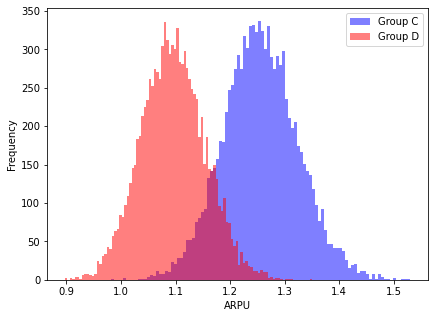

95% confidence interval for mean group C ARPU:  [1.12 1.4 ]
95% confidence interval for mean group D ARPU:  [0.98 1.21]


In [100]:
groupC_median_scores = list(map(np.mean, get_bootstrap_samples(total_revenue_C.values, 10000)))
groupD_median_scores = list(map(np.mean, get_bootstrap_samples(total_revenue_D.values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupC_median_scores, alpha = .5, color = 'b', label = 'Group C', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupD_median_scores, alpha = .5, color = 'r', label = 'Group D', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU') 
pylab.show()

print("95% confidence interval for mean group C ARPU: ",  stat_intervals(groupC_median_scores, 0.05))
print("95% confidence interval for mean group D ARPU: ",  stat_intervals(groupD_median_scores, 0.05))

In [101]:
scipy.stats.mannwhitneyu(total_revenue_C.values, total_revenue_D.values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=106089430.5, pvalue=0.038092625309797)

In [102]:
arpdau_C = purchases[purchases['configTag'] == 'C'].groupby('eventDate')['revenue'].agg('sum') / purchases[purchases['configTag'] == 'C'].groupby('eventDate')['userID'].nunique()
arpdau_D = purchases[purchases['configTag'] == 'D'].groupby('eventDate')['revenue'].agg('sum') / purchases[purchases['configTag'] == 'D'].groupby('eventDate')['userID'].nunique()

In [108]:
[arpdau_C.mean(), arpdau_D.mean()]

[0.2211462350758643, 0.19667800993715792]

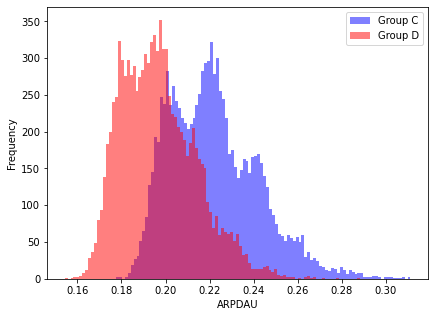

95% confidence interval for mean group C ARPDAU:  [0.19 0.27]
95% confidence interval for mean group D ARPDAU:  [0.17 0.23]


In [103]:
groupC_median_scores = list(map(np.mean, get_bootstrap_samples(arpdau_C.values, 10000)))
groupD_median_scores = list(map(np.mean, get_bootstrap_samples(arpdau_D.values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupC_median_scores, alpha = .5, color = 'b', label = 'Group C', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupD_median_scores, alpha = .5, color = 'r', label = 'Group D', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPDAU') 
pylab.show()

print("95% confidence interval for mean group C ARPDAU: ",  stat_intervals(groupC_median_scores, 0.05))
print("95% confidence interval for mean group D ARPDAU: ",  stat_intervals(groupD_median_scores, 0.05))

In [104]:
scipy.stats.mannwhitneyu(arpdau_C.values, arpdau_D.values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=117.0, pvalue=0.05039604635391879)

In [105]:
arppdau_C = purchases[(purchases['configTag'] == 'C')].groupby('eventDate')['revenue'].agg('sum') / purchases[(purchases['configTag'] == 'C') & (purchases['moneySpent'] > 0)].groupby('eventDate')['userID'].nunique()
arppdau_D = purchases[purchases['configTag'] == 'D'].groupby('eventDate')['revenue'].agg('sum') / purchases[(purchases['configTag'] == 'D')  & (purchases['moneySpent'] > 0)].groupby('eventDate')['userID'].nunique()

In [109]:
[arppdau_C.mean(), arppdau_D.mean()]

[1.1439080087100988, 1.0710434937963826]

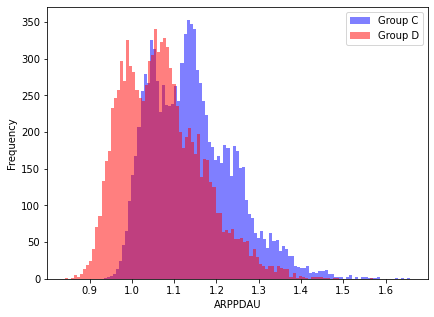

95% confidence interval for mean group C ARPPDAU:  [1.   1.37]
95% confidence interval for mean group D ARPPDAU:  [0.93 1.29]


In [106]:
groupC_median_scores = list(map(np.mean, get_bootstrap_samples(arppdau_C.values, 10000)))
groupD_median_scores = list(map(np.mean, get_bootstrap_samples(arppdau_D.values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupC_median_scores, alpha = .5, color = 'b', label = 'Group C', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupD_median_scores, alpha = .5, color = 'r', label = 'Group D', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPPDAU') 
pylab.show()

print("95% confidence interval for mean group C ARPPDAU: ",  stat_intervals(groupC_median_scores, 0.05))
print("95% confidence interval for mean group D ARPPDAU: ",  stat_intervals(groupD_median_scores, 0.05))

In [107]:
scipy.stats.mannwhitneyu(arppdau_C.values, arppdau_D.values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=105.0, pvalue=0.15253041101077652)

In [120]:
ltv_C = purchases[purchases['configTag'] == 'C'].groupby('userID')['moneySpent'].agg('min').reset_index()
ltv_D = purchases[purchases['configTag'] == 'D'].groupby('userID')['moneySpent'].agg('min').reset_index()

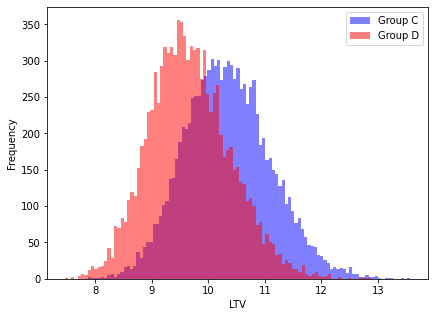

95% confidence interval for mean group C Money Spent:  [ 8.94 11.92]
95% confidence interval for mean group D Money Spent:  [ 8.38 11.18]


In [121]:
groupC_median_scores = list(map(np.mean, get_bootstrap_samples(ltv_C['moneySpent'].values, 10000)))
groupD_median_scores = list(map(np.mean, get_bootstrap_samples(ltv_D['moneySpent'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupC_median_scores, alpha = .5, color = 'b', label = 'Group C', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupD_median_scores, alpha = .5, color = 'r', label = 'Group D', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('LTV') 
pylab.show()

print("95% confidence interval for mean group C Money Spent: ",  stat_intervals(groupC_median_scores, 0.05))
print("95% confidence interval for mean group D Money Spent: ",  stat_intervals(groupD_median_scores, 0.05))

In [122]:
scipy.stats.mannwhitneyu(ltv_C['moneySpent'].values, ltv_D['moneySpent'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=105641935.0, pvalue=0.44567384822365774)

In [124]:
[ltv_C[ltv_C['moneySpent'] > 100]['userID'].nunique(), ltv_D[ltv_D['moneySpent'] > 100]['userID'].nunique()]

[282, 297]

In [125]:
[ltv_C[(ltv_C['moneySpent'] > 10) & (ltv_C['moneySpent'] <= 100)]['userID'].nunique(), ltv_D[(ltv_D['moneySpent'] > 10) & (ltv_D['moneySpent'] <= 100)]['userID'].nunique()]

[1173, 1172]

In [126]:
[ltv_C[(ltv_C['moneySpent'] > 0) & (ltv_C['moneySpent'] <= 10)]['userID'].nunique(), ltv_D[(ltv_D['moneySpent'] > 0) & (ltv_D['moneySpent'] <= 10)]['userID'].nunique()]

[972, 1053]

In [127]:
[ltv_C[ltv_C['moneySpent'] == 0]['userID'].nunique(), ltv_D[ltv_D['moneySpent'] == 0]['userID'].nunique()]

[11822, 12297]